# 1 задача

В данной задаче вам предстоит написать программу для определения количества пучностей на записи сигнала электромиограммы (ЭМГ) — электрического сигнала, возникающего при напряжении мышцы человека. Данные, представленные в этой задаче, были сгенерированны на основании сигнала считанного с закреплённого на руке датчика.

Сигнал представлен последовательностью целых чисел, разделенных запятой, лежащих в диапазное от 0 до 255. Средний уровень сигнала в состоянии покоя равен 127. Пучностью будем считать отрезок записи, на котором двойная амплитуда сигнала 2А превышает значение 90. Двойную амплитуду сигнала следует считать как разность максимального и минимального значений сигнала по 50 последовательным точкам. Между соседними пучностями находится не менее 250 точек.

Ниже представлена визуализация тестовых данных данной задачи:

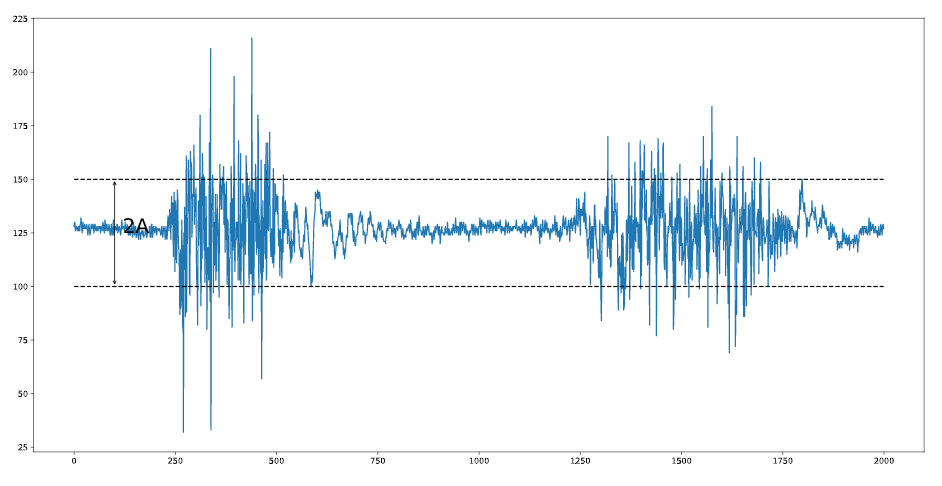

Как вы можете убедиться, в представленном сигнале 2 пучности. Ваши решения будут тестироваться на более длительных записях сигнала.

In [15]:
# Решение 1 задачи 2 блока 2 этапа трека Нейротехнологии и когнитивные науки
# Олимпиады НТИ 19/20

data = [int(i) for i in input().split(',')]
# Переменную i используем для перебора элементов массива data, в
# переменной ans храним число обнаруженных пучностей.
max_i = len(data) - 50
ans = i = 0

while i < max_i:
    # Двойную амплитуду сигнала по условию считаем по 50 последовательным точкам
    chunk = data[i:i+50]
    if max(chunk) - min(chunk) > 90:
        ans += 1
        # Увеличиваем i на 250 при обнаружении пучности, так как согласно условию
        # между соседними пучностями находится не менее 250 точек
        i += 250
    else:
        i += 1

print(ans)



128,130,130,126,126,127,128,128,127,126,126,128,128,126,126,129,129,132,130,127,125,128,130,127,127,127,129,128,127,127,127,129,128,126,124,126,128,129,126,124,125,126,129,128,127,127,129,129,127,125,127,129,129,127,126,126,128,128,126,126,127,128,128,127,128,125,127,128,127,126,128,130,129,126,126,125,131,130,129,126,127,129,127,126,126,127,129,128,126,124,124,127,129,126,124,125,128,131,124,124,127,128,128,127,126,127,129,129,125,126,126,128,128,127,125,124,126,129,131,127,128,128,128,127,126,127,130,127,128,127,127,129,128,126,124,124,128,127,124,124,127,125,128,127,123,124,128,130,126,124,127,128,128,123,123,125,126,127,124,122,125,128,124,125,122,124,125,126,126,124,126,125,123,124,124,124,127,126,125,123,123,125,125,125,125,125,128,128,123,124,123,129,129,126,123,126,128,128,126,125,125,127,128,127,124,126,127,127,127,126,126,127,126,125,124,124,128,128,125,123,125,127,128,127,125,122,125,128,125,122,123,130,133,131,126,129,136,129,130,122,137,142,129,129,139,114,131,144,135,107,

# 2 Задача

С помощью сигнала ЭМГ была передана последовательность символов латинского алфавита (все символы прописные). Напишите программу, востанавливающую исходную последовательность по электромиограмме.

Сигнал представлен последовательностью целых чисел, разделенных запятой, лежащих в диапазное от 0 до 255. Средний уровень сигнала в состоянии покоя равен 127.

Точки и тире избуки Морзе закодированы с помощью пучностей. Точку кодирует пучность, двойная амплитуда которой 2А больше 50 но меньше 100, тире соответствует пучность с двойной амплитудой больше 100. Буквы разделены участками без пучностей. На наличие пучностей следует проверять последовательные участки сигнала длиной 250 точек. Первому участку соответствуют точки с 1 по 250, второму - с 251 по 500 и т.д.

Ниже представлена визуализация тестовых данных данной задачи:

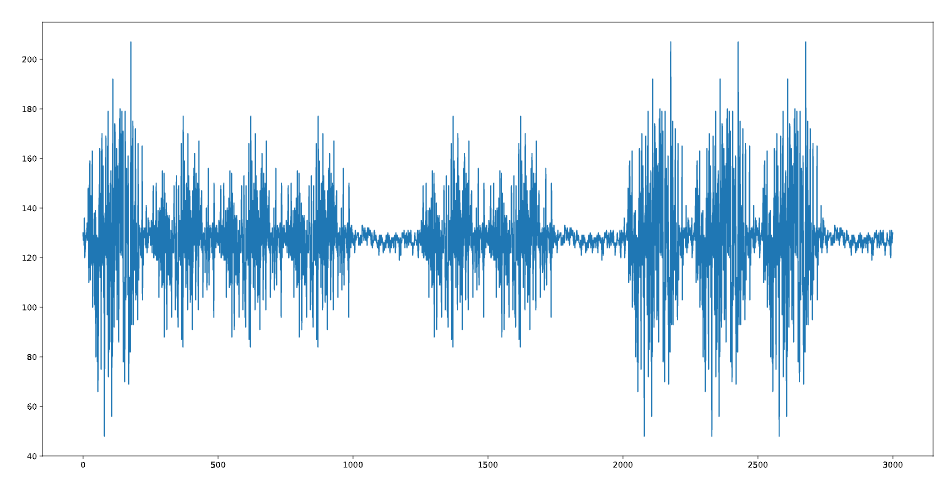

Попрактиковаться в работе с азбукой Морзе вы можете в предыдущей учебной задаче.

In [16]:
# Решение 2 задачи 2 блока 2 этапа трека Нейротехнологии и когнитивные науки
# Олимпиады НТИ 19/20

decoder = {'.-': 'A', '-...': 'B', '-.-.': 'C',
           '-..': 'D', '.': 'E', '..-.': 'F',
           '--.': 'G', '....': 'H', '..': 'I',
           '.---': 'J', '-.-': 'K', '.-..': 'L',
           '--': 'M', '-.': 'N', '---': 'O',
           '.--.': 'P', '--.-': 'Q', '.-.': 'R',
           '...': 'S', '-': 'T', '..-': 'U',
           '...-': 'V', '.--': 'W', '-..-': 'X',
           '-.--': 'Y', '--..': 'Z', '.----': '1',
           '..---': '2', '...--': '3', '....-': '4',
           '.....': '5', '-....': '6', '--...': '7',
           '---..': '8', '----.': '9', '-----': '0',
           '--..--': ', ', '.-.-.-': '.', '..--..': '?',
           '-..-.': '/', '-....-': '-', '-.--.': '(',
           '-.--.-': ')'}

data = [int(i) for i in input().split(',')]
# В переменной letter_code хранится последовательность точек и тире соответствующая
# одному символу. В переменной letters хранятся уже декодированные из азбуки Морзе символы.
letter_code = ''
letters = []

for i in range(0, len(data), 250):
    chunk = data[i:i+250]
    ampl = max(chunk) - min(chunk)
    if ampl > 100:
        letter_code += '-'
    elif ampl > 50:
        letter_code += '.'
    elif letter_code:
        # Если на отрезке сигнала отсутствует пучность, считаем кодирующую символ
        # последовательность завершённой
        letters.append(decoder[letter_code])
        letter_code = ''

print(''.join(letters))



130,127,127,130,125,136,120,122,123,126,129,127,130,129,131,134,128,127,128,148,147,110,116,139,157,159,138,111,125,145,137,132,117,135,163,100,105,120,121,129,118,135,138,101,126,99,139,80,121,96,129,110,127,78,128,66,80,114,131,144,120,164,117,112,142,131,146,75,163,143,170,117,131,129,157,128,104,134,115,48,118,136,138,121,169,131,120,141,125,129,97,165,122,179,72,117,146,83,128,86,114,150,113,155,143,115,56,134,80,83,192,114,108,104,148,92,127,174,173,165,125,133,115,120,164,147,95,111,157,116,126,110,86,158,141,176,134,180,122,170,142,121,155,125,179,140,120,165,171,78,98,110,102,110,70,101,179,131,103,111,136,156,134,149,126,135,105,161,131,69,105,93,112,108,82,82,121,207,110,165,93,150,107,128,175,129,93,122,123,115,141,129,115,139,172,103,119,134,105,114,119,122,95,128,166,126,111,128,133,125,132,129,127,121,127,130,120,132,131,165,103,131,127,117,126,130,132,131,129,128,131,132,125,124,141,126,130,122,127,127,124,136,126,135,133,129,132,130,129,132,125,125,125,135,134,129,122,

BIO


Дополнительные материалы:
- Фильтры. [Фильтры в общем](https://www.youtube.com/watch?v=_2feIfRZjCY). [Фильтры и их сравнение](https://skilldiagram.com/gl5-5.html)
- Быстрое преобразование фурье. [Подробный разбор алгоритма](https://www.youtube.com/watch?v=W-fF2Ermhe4). [Суть преобразования](https://proglib.io/p/fourier-transform/). Увы, без сложной математики не обойтись, но там очень наглядно

# 3 задача

Как и в предыдущей задаче, последовательность прописных букв латинского алфавита была закодирована с помощью азбуки Морзе в сигнале ЭМГ. На этот раз на сигнал был наложен шум, который затрудняет считывание последовательности. Напишите программу, восстанавливающую исходную последовательность по электромиограмме.

Частота оцифровки электромиограммы равна 250 Гц. Сигнал представлен последовательностью разделенных запятой целых чисел. Точки и тире избуки Морзе закодированы с помощью пучностей. Точку кодирует пучность меньшей амплитуды, тире - большей. Буквы разделены участками без пучностей. На наличие пучностей следует проверять последовательные участки сигнала длиной 250 точек. Первому участку соответствуют точки с 1 по 250, второму - с 251 по 500 и т.д.

В качестве первого теста вам предоставляется образец зашумлённого сигнала. Остальные тестовые примеры имеют шум той же амплитуды и частоты что и образец.

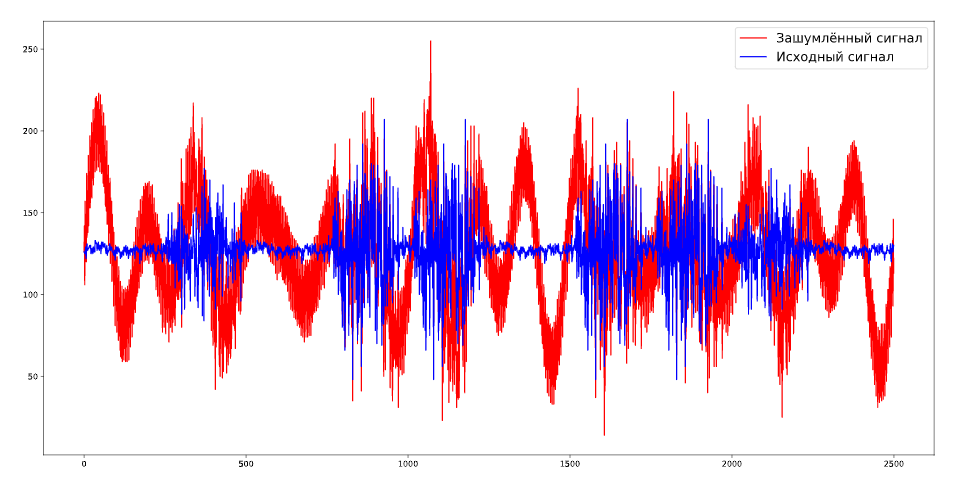

In [ ]:
# Решение 3 задачи 2 блока 2 этапа трека Нейротехнологии и когнитивные науки
# Олимпиады НТИ 19/20

import numpy as np
from scipy.signal import butter, lfilter

decoder = {'.-': 'A', '-...': 'B', '-.-.': 'C',
           '-..': 'D', '.': 'E', '..-.': 'F',
           '--.': 'G', '....': 'H', '..': 'I',
           '.---': 'J', '-.-': 'K', '.-..': 'L',
           '--': 'M', '-.': 'N', '---': 'O',
           '.--.': 'P', '--.-': 'Q', '.-.': 'R',
           '...': 'S', '-': 'T', '..-': 'U',
           '...-': 'V', '.--': 'W', '-..-': 'X',
           '-.--': 'Y', '--..': 'Z', '.----': '1',
           '..---': '2', '...--': '3', '....-': '4',
           '.....': '5', '-....': '6', '--...': '7',
           '---..': '8', '----.': '9', '-----': '0',
           '--..--': ', ', '.-.-.-': '.', '..--..': '?',
           '-..-.': '/', '-....-': '-', '-.--.': '(',
           '-.--.-': ')'}

data = [int(i) for i in input().split(',')]
# Полосу пропускания фильтра (от 4 до 90 Гц) нашли изучив спектр примера сигнала.
# Подробнее см. решение задачи 4.
b, a = butter(3, [4/125, 90/125], btype='bandpass')
data = lfilter(b, a, data)
# Начало сигнала приравниваем к 0, так как после фильтрации там присутствует возмущение
# прямопропорциональное порядку фильтра. Изменение значений 50 точек участка сигнала длиной
# 250 существенно не повлияет на двойную амплитуду участка.
data[:50] = 0

letter_code = ''
letters = []
for i in range(0, len(data), 250):
    chunk = data[i:i+250]
    ampl = max(chunk) - min(chunk)
    if ampl > 100:
        letter_code += '-'
    elif ampl > 50:
        letter_code += '.'
    elif letter_code:
        letters.append(decoder[letter_code])
        letter_code = ''

print(''.join(letters))


# 4 задача

Так же как и в задаче № 3, вы должны восстановить последовательность прописных букв латинского алфавита по зашумлённому сигналу электромиограммы с помощью азбуки Морзе. Шум, искажающий сигнал ЭМГ будет сгенерирован случайным образом, вы заранее не можете знать частоты зашумляющих сигнал гармоник.

В отличие от предыдущих задач, где тестовые данные вам были недоступны, в этой задаче вы должны будете скачать файл с тестовыми данными. От вас потребуется в течение 5 минут после скачивания данных проанализировать сигнал, обработать его таким образом, чтобы кодирующие точки и тире пучности стали различимы, восстановить исходную последовательность прописных букв латинского алфавита и прислать её в качестве ответа.

Частота оцифровки электромиограммы равна 250 Гц. Сигнал представлен последовательностью разделенных запятой целых чисел. Точки и тире избуки Морзе закодированы с помощью пучностей. Точку кодирует пучность меньшей амплитуды, тире - большей. Буквы разделены участками без пучностей. На наличие пучностей следует проверять последовательные участки сигнала длиной 250 точек. Первому участку соответствуют точки с 1 по 250, второму - с 251 по 500 и т.д.

Так как количество попыток ограничено, рекомендуем освоиться с предыдущей учебной задачей.

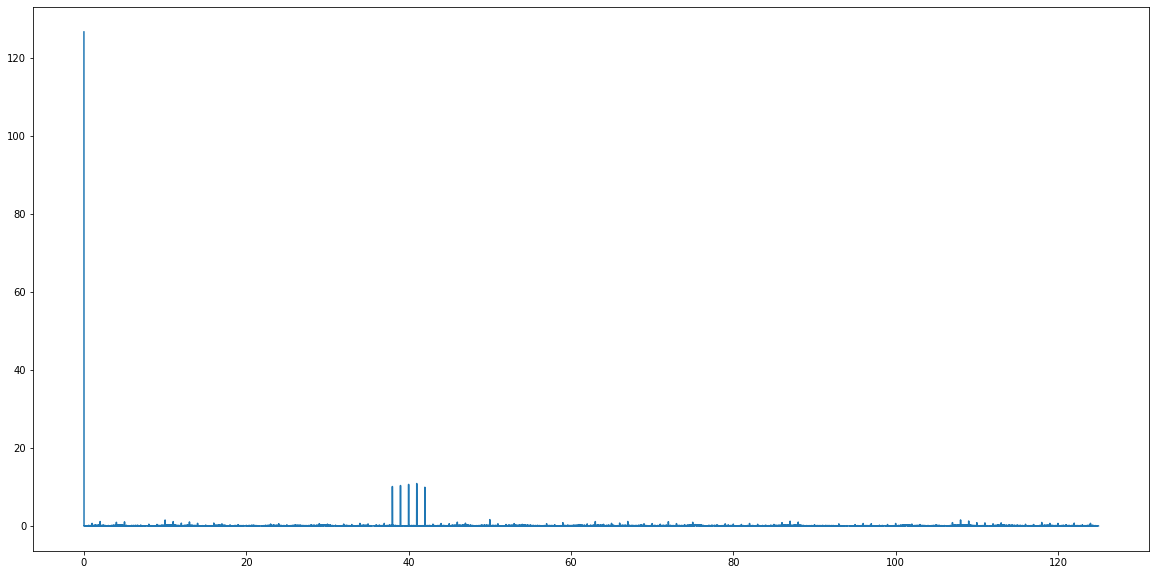

In [10]:
# 1 часть (из 2) решения 4 задачи 2 блока 2 этапа трека
# Нейротехнологии и когнитивные науки Олимпиады НТИ 19/20

import numpy as np
import matplotlib.pyplot as plt

def get_spectrum(y):
    """Функция возвращает для переданного ей в качестве аргумента сигнала два массива:
    массив частот и массив амплитуд гармоник соответствующим данным частотам."""
    Fs = 250.0
    Ts = 1.0/Fs
    n = len(y)
    k = np.arange(n)
    T = n/Fs
    frq = k/T
    frq = frq[range(n//2)]
    Y = np.fft.fft(y)/n
    Y = Y[range(n//2)]
    return frq, abs(Y)

# В переменную data считываем сигнал из содержащего индивидуальный набор данных файла.
with open('file.txt', 'r') as data_file:
    data = np.array(data_file.read().split(','), dtype=np.int)

frq, ampl = get_spectrum(data)

plt.figure(figsize=(20,10))

# Строим график спектра сигнала из индивидуального набора данных. На графике
# мы увидим частоты шумов которые нам следуюет отфильтровать для расшифровки
# последовательности символов.
plt.plot(frq, ampl)
plt.show()



In [9]:
# 2 часть (из 2) решения 4 задачи 2 блока 2 этапа трека
# Нейротехнологии и когнитивные науки Олимпиады НТИ 19/20

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

decoder = {'.-': 'A', '-...': 'B', '-.-.': 'C',
           '-..': 'D', '.': 'E', '..-.': 'F',
           '--.': 'G', '....': 'H', '..': 'I',
           '.---': 'J', '-.-': 'K', '.-..': 'L',
           '--': 'M', '-.': 'N', '---': 'O',
           '.--.': 'P', '--.-': 'Q', '.-.': 'R',
           '...': 'S', '-': 'T', '..-': 'U',
           '...-': 'V', '.--': 'W', '-..-': 'X',
           '-.--': 'Y', '--..': 'Z', '.----': '1',
           '..---': '2', '...--': '3', '....-': '4',
           '.....': '5', '-....': '6', '--...': '7',
           '---..': '8', '----.': '9', '-----': '0',
           '--..--': ', ', '.-.-.-': '.', '..--..': '?',
           '-..-.': '/', '-....-': '-', '-.--.': '(',
           '-.--.-': ')'}

with open('file.txt', 'r') as data_file:
    data = np.array(data_file.read().split(','), dtype=np.int)

# Полосу заграждения режекторного фильтра (в данном примере от 35 до 45 Гц)
# подобрали в первой части решения определив частоты помех в сигнале из
# индивидуального набора данных.
b, a = butter(7, [35/125, 45/125], btype='bandstop')
data = lfilter(b, a, data)
data[:50] = 127

letter_code = ''
letters = []
for i in range(0, len(data), 250):
    chunk = data[i:i+250]
    ampl = max(chunk) - min(chunk)
    if ampl > 110:
        letter_code += '-'
    elif ampl > 50:
        letter_code += '.'
    elif letter_code:
        letters.append(decoder[letter_code])
        letter_code = ''

print(''.join(letters))

SKLVZTTAGUWLQRBPIUYG


In [8]:
data

array([127.        , 127.        , 127.        , ...,  81.40831839,
        49.04744971,  22.84346799])